## Udacity Project 1
* Developed By: Tyler Hunt
* Date: 9/12/21
* Project Objectives
    * Does host response time affect earnings?
    * Does property type affect earnings?
    * Can monthly earning be predicted based off of response time and property type?
* Project data  
    * Details: This is the Seattle AirBnB dataset as recommended by instructors
    * Data source Kaggle: https://www.kaggle.com/airbnb/seattle/data
    * Data source AirBnB: http://insideairbnb.com/get-the-data.html
    * Dataset names: Calendar.csv, Listings.csv, Reviews.csv
    * Data reference 1: calendar.listing_id = listings.id
    * Data reference 2: reviews.listing_id  = listings.id
* Project sequence details
    * Pick data set to perform the analysis
    * Set up a github repo at [The Vektir Group](https://github.com/vektirgroup/Udacity_Project_1)
    * Acquire, clean, prepare and explore the data
    * Define clear and objective questions to answer

In [223]:
# Import required libs
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [224]:
## Acquire data 
home_dir = os.path.dirname(os.path.abspath('__file__'))  
data_dir = home_dir + '/data/'

df_calendar = pd.read_csv(data_dir +'/calendar.csv')
df_listings = pd.read_csv(data_dir +'/listings.csv')
df_reviews  = pd.read_csv(data_dir +'/reviews.csv')

#### Explore Listings dataframe

In [225]:
## Explore Listing Dataframe
# df_listings.info()          # df info

In [226]:
## Explore Listing Dataframe
# df_listings.head()          # preview data

In [227]:
# Sub-set dataframe
df = df_listings[['id', 'host_name', 'host_response_time','host_response_rate',
                 'host_acceptance_rate', 'host_is_superhost', 'city', 'state','zipcode',
                 'property_type','room_type','accommodates','bathrooms','bedrooms','beds',
                 'price','cleaning_fee','review_scores_rating','number_of_reviews'
                ]].copy()
df.head()

,id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,city,state,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,review_scores_rating,number_of_reviews
0,241032,Maija,within a few hours,96%,100%,f,Seattle,WA,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,NaN,95.0,207
1,953595,Andrea,within an hour,98%,100%,t,Seattle,WA,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,$40.00,96.0,43
2,3308979,Jill,within a few hours,67%,100%,f,Seattle,WA,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,$300.00,97.0,20
3,7421966,Emily,NaN,NaN,NaN,f,Seattle,WA,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,NaN,NaN,0
4,278830,Emily,within an hour,100%,NaN,f,Seattle,WA,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,$125.00,92.0,38


In [228]:
def clean_data(df):
    df['host_is_superhost'] = df['host_is_superhost'].replace('t', True, regex=True).astype(bool)
    df['host_is_superhost'] = df['host_is_superhost'].replace('[f', False, regex=True).astype(bool)
    df['host_response_rate'] = df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)/100
    df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)/100
    df['review_scores_rating'] = df['review_scores_rating']/100
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

clean_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 19 columns):
id                      3818 non-null int64
host_name               3816 non-null object
host_response_time      3295 non-null object
host_response_rate      3295 non-null float64
host_acceptance_rate    3045 non-null float64
host_is_superhost       3818 non-null bool
city                    3818 non-null object
state                   3818 non-null object
zipcode                 3811 non-null object
property_type           3817 non-null object
room_type               3818 non-null object
accommodates            3818 non-null int64
bathrooms               3802 non-null float64
bedrooms                3812 non-null float64
beds                    3817 non-null float64
price                   3818 non-null float64
cleaning_fee            2788 non-null float64
review_scores_rating    3171 non-null float64
number_of_reviews       3818 non-null int64
dtypes: bool(1), float64(8), int64(

In [229]:
df.head()

,id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,city,state,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,review_scores_rating,number_of_reviews
0,241032,Maija,within a few hours,0.96,1.0,True,Seattle,WA,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,NaN,0.95,207
1,953595,Andrea,within an hour,0.98,1.0,True,Seattle,WA,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,40.0,0.96,43
2,3308979,Jill,within a few hours,0.67,1.0,True,Seattle,WA,98119,House,Entire home/apt,11,4.5,5.0,7.0,975.0,300.0,0.97,20
3,7421966,Emily,NaN,NaN,NaN,True,Seattle,WA,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,100.0,NaN,NaN,0
4,278830,Emily,within an hour,1.00,NaN,True,Seattle,WA,98119,House,Entire home/apt,6,2.0,3.0,3.0,450.0,125.0,0.92,38


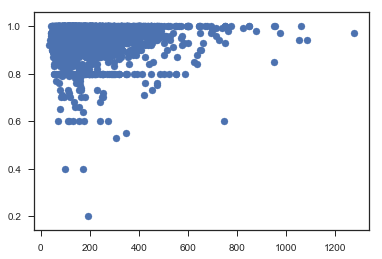

In [242]:
x = df["review_scores_rating"]
y = df['total_price'] = df['price'] + df['cleaning_fee']
sc = plt.scatter(x=y, y=x)
plt.show(sc)